In [149]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score,recall_score,f1_score
import scipy
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [150]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    此函数打印和绘制混淆矩阵
    可以通过设置“normalize=True”来应用规范化。
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # 计算混淆矩阵
    cm = confusion_matrix(y_true, y_pred)
    # 仅使用数据中显示的标签
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
    #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots(figsize=(12, 6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # 显示所有的标记...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... 用相应的列表条目标记它们
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # 旋转x轴标签并设置其对齐方式。
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # 在数据维度上循环并创建文本批注
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


In [183]:
#file='D:/Research/EEGdata/train_set.csv' #原始滤波后数据
file='D:/Research/EEGdata/train/train_set_drop_new.csv' #去除异常值平均三类的数据
raw= pd.read_csv(file)
raw_data=raw.values
#X = raw_data[:, [0,7,8,15,16,23]] #8channels
#X = raw_data[:, [0,1,6,7,8,9,14,15,16,17,22,23]] #12 channels
#X = raw_data[:, [2,3,4,5,10,11,12,13,18,19,20,21]]
X = raw_data[:, :24]
y = raw_data[:,24]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)


sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

min_max_scaler = MinMaxScaler(feature_range=(0, 1), copy=True)
X_train_scaled = min_max_scaler.fit_transform(X_train_scaled)
X_test_scaled = min_max_scaler.fit_transform(X_test_scaled)

准确度为： 0.8402777777777778
精确率为： 0.5868347338935574
召回率为：
 0.5569958847736626
0.8402777777777778
测试集的准确率是： 0.8402777777777778
准确度为： 0.8402777777777778
精确率为： 0.5868347338935574
精确率为： [0.97619048 0.78431373 0.        ]
召回率为： 0.5569958847736626
召回率为： [0.68333333 0.98765432 0.        ]


c:\Users\weipa\.conda\envs\py310_tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\weipa\.conda\envs\py310_tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\weipa\.conda\envs\py310_tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


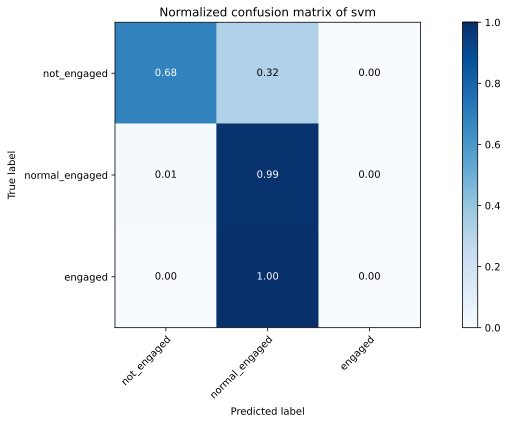

In [184]:
from sklearn.svm import SVC
svm_model = SVC(C=1)
svm_model.fit(X_train_scaled,y_train.astype('int'))
y_pred = svm_model.predict(X_test_scaled)
#print(y_pred)
#print(y_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
accuracy = metrics.accuracy_score(y_test,y_pred)
print("准确度为：",accuracy)
# 计算精确率（precision）
precision = metrics.precision_score(y_test,y_pred,average='macro')
print("精确率为：",precision)
# 计算召回率（recall）
recall = metrics.recall_score(y_test,y_pred,average='macro')
print("召回率为：\n",recall)

#matrix_train = confusion_matrix(y_train,svm_model.predict(X_train))
#print('训练集的混淆矩阵是：',matrix_train)
#report_train = classification_report(y_train,svm_model.predict(X_train_scaled))
#print('训练集的分类报告是：',report_train)

print(1-lin_mse)
print('测试集的准确率是：',svm_model.score(X_test_scaled,y_test))
#matrix_test = confusion_matrix(y_test,svm_model.predict(X_test_scaled))
#print('测试集的混淆矩阵是：',matrix_test)
#report_test = classification_report(y_test,svm_model.predict(X_test_scaled))
#print('测试集的分类报告是：',report_test)

accuracy = metrics.accuracy_score(y_test,y_pred)
print("准确度为：",accuracy)
# 计算精确率（precision）
precision = metrics.precision_score(y_test,y_pred,average='macro')
print("精确率为：",precision)
precision1 = metrics.precision_score(y_test,y_pred,average=None)
print("精确率为：",precision1)
# 计算召回率（recall）
recall = metrics.recall_score(y_test,y_pred,average='macro')
print("召回率为：",recall)
recall1 = metrics.recall_score(y_test,y_pred,average=None)
print("召回率为：",recall1)
# 绘制归一化混淆矩阵
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
emotion_labels = ['not_engaged', " normal_engaged","engaged" ]
plot_confusion_matrix(y_test, y_pred, classes=emotion_labels, normalize=True, title='Normalized confusion matrix of svm')
plt.savefig('figs/svm.png',dpi=300,bbox_inches='tight')
plt.show()


In [153]:
'''
sns.set()
f,ax=plt.subplots()
sns.heatmap(matrix_test,annot=True,ax=ax) #画热力图
ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('true') #y轴
'''

"\nsns.set()\nf,ax=plt.subplots()\nsns.heatmap(matrix_test,annot=True,ax=ax) #画热力图\nax.set_title('confusion matrix') #标题\nax.set_xlabel('predict') #x轴\nax.set_ylabel('true') #y轴\n"

准确度为： 0.6388888888888888
精确率为： 0.5382716049382715
召回率为： 0.3869047619047619


c:\Users\weipa\.conda\envs\py310_tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


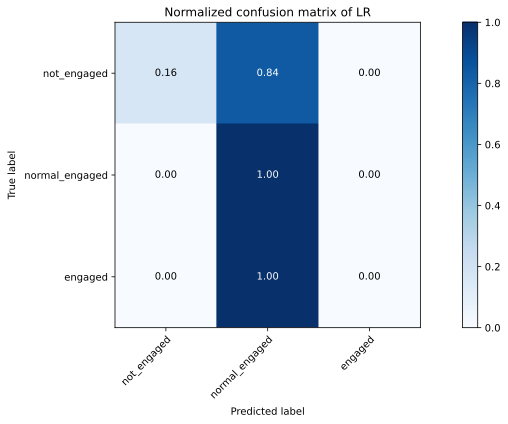

In [162]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)


sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

min_max_scaler = MinMaxScaler(feature_range=(0, 1), copy=True)
X_train_scaled = min_max_scaler.fit_transform(X_train_scaled)
X_test_scaled = min_max_scaler.fit_transform(X_test_scaled)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train.astype('int'))
y_pred = lr.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_mse
accuracy = metrics.accuracy_score(y_test,y_pred)
print("准确度为：",accuracy)
# 计算精确率（precision）
precision = metrics.precision_score(y_test,y_pred,average='macro')
print("精确率为：",precision)
# 计算召回率（recall）
recall = metrics.recall_score(y_test,y_pred,average='macro')
print("召回率为：",recall)
# 绘制归一化混淆矩阵
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
emotion_labels = ['not_engaged', " normal_engaged","engaged" ]
plot_confusion_matrix(y_test, y_pred, classes=emotion_labels, normalize=True, title='Normalized confusion matrix of LR')
plt.savefig('figs/LR.png',dpi=300,bbox_inches='tight')
plt.show()



准确度为： 0.7777777777777778
精确率为： 0.5926624737945493
召回率为： 0.6068825343425849


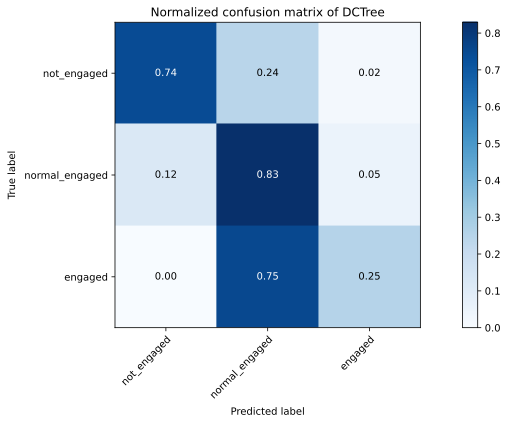

In [180]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

min_max_scaler = MinMaxScaler(feature_range=(0, 1), copy=True)
X_train_scaled = min_max_scaler.fit_transform(X_train_scaled)
X_test_scaled = min_max_scaler.fit_transform(X_test_scaled)


from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_scaled,y_train)
y_pred = tree_reg.predict(X_test_scaled)
lin_mse = mean_squared_error(y_test, y_pred)
lin_mse

accuracy = metrics.accuracy_score(y_test,y_pred)
print("准确度为：",accuracy)
# 计算精确率（precision）
precision = metrics.precision_score(y_test,y_pred,average='macro')
print("精确率为：",precision)

# 计算召回率（recall）
recall = metrics.recall_score(y_test,y_pred,average='macro')
print("召回率为：",recall)

# 绘制归一化混淆矩阵
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
emotion_labels = ['not_engaged', " normal_engaged","engaged" ]
plot_confusion_matrix(y_test, y_pred, classes=emotion_labels, normalize=True, title='Normalized confusion matrix of DCTree')
plt.savefig('figs/DCTree.png',dpi=300,bbox_inches='tight')
plt.show()

准确度为： 0.8194444444444444
精确率为： 0.54890098810244
召回率为： 0.5614403811125123


c:\Users\weipa\.conda\envs\py310_tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


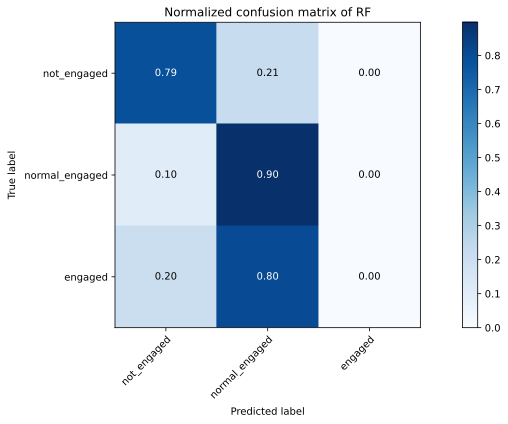

In [165]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)
min_max_scaler = MinMaxScaler(feature_range=(0, 1), copy=True)
X_train_scaled = min_max_scaler.fit_transform(X_train_scaled)
X_test_scaled = min_max_scaler.fit_transform(X_test_scaled)

from sklearn.ensemble import RandomForestClassifier
forest_reg = RandomForestClassifier()
forest_reg.fit(X_train_scaled,y_train)
y_pred = forest_reg.predict(X_test_scaled)

lin_mse = mean_squared_error(y_test, y_pred)
lin_mse
accuracy = metrics.accuracy_score(y_test,y_pred)
print("准确度为：",accuracy)
# 计算精确率（precision）
precision = metrics.precision_score(y_test,y_pred,average='macro')
print("精确率为：",precision)
# 计算召回率（recall）
recall = metrics.recall_score(y_test,y_pred,average='macro')
print("召回率为：",recall)
# 绘制归一化混淆矩阵
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
emotion_labels = ['not_engaged', " normal_engaged","engaged" ]
plot_confusion_matrix(y_test, y_pred, classes=emotion_labels, normalize=True, title='Normalized confusion matrix of RF')
plt.savefig('figs/RF.png',dpi=300,bbox_inches='tight')
plt.show()

准确度为： 0.8125
精确率为： 0.5413839891451832
召回率为： 0.5575657894736842


c:\Users\weipa\.conda\envs\py310_tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


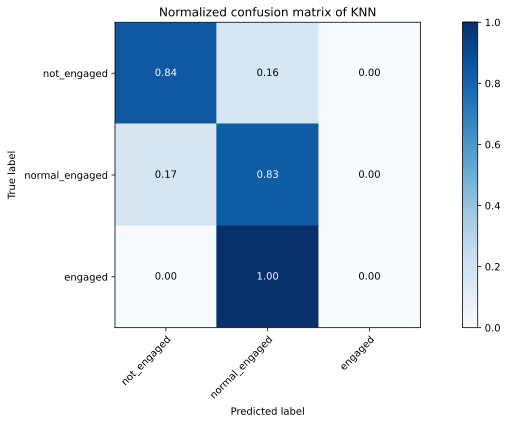

In [176]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

min_max_scaler = MinMaxScaler(feature_range=(0, 1), copy=True)
X_train_scaled = min_max_scaler.fit_transform(X_train_scaled)
X_test_scaled = min_max_scaler.fit_transform(X_test_scaled)

from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train.astype('int')) 
y_pred = knn.predict(X_test_scaled)

lin_mse = mean_squared_error(y_test, y_pred)
lin_mse
accuracy = metrics.accuracy_score(y_test,y_pred)
print("准确度为：",accuracy)
# 计算精确率（precision）
precision = metrics.precision_score(y_test,y_pred,average='macro')
print("精确率为：",precision)
# 计算召回率（recall）
recall = metrics.recall_score(y_test,y_pred,average='macro')
print("召回率为：",recall)
# 绘制归一化混淆矩阵
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
emotion_labels = ['not_engaged', " normal_engaged","engaged" ]
plot_confusion_matrix(y_test, y_pred, classes=emotion_labels, normalize=True, title='Normalized confusion matrix of KNN')
plt.savefig('figs/KNN.png',dpi=300,bbox_inches='tight')
plt.show()